In [1]:
# !pip install -r requirements.txt


## sdfs by Alex Wieker

In [2]:
import pandas as pd
import numpy as np
import bqplot
import ipywidgets
import matplotlib
import matplotlib.pyplot as plt

In [3]:
# read in the dataset
crimes_df = pd.read_csv("Crimes_2001_to_present.csv")

# rename crime types that  will interfer with visualizations
crimes_df['Primary Type'] = crimes_df['Primary Type']\
.replace(['MOTOR VEHICLE THEFT', 'CONCEALED CARRY LICENSE VIOLATION', 
                              'INTERFERENCE WITH PUBLIC OFFICER', 'OTHER NARCOTIC VIOLATION',
                              'PUBLIC PEACE VIOLATION', 'NON-CRIMINAL (SUBJECT SPECIFIED)', 
                             'OFFENSE INVOLVING CHILDREN', 'CRIM SEXUAL ASSAULT', 
                              'LIQUOR LAW VIOLATION', 'WEAPONS VIOLATION'],
                             ['VEHICLE THEFT', 'CONCEALED CARRY VIO', 'INTERFER WITH POLICE', 
                             'OTHER NARCOTIC VIO', 'PUBLIC PEACE VIO', 'NON-CRIMINAL SUBJ', 
                             'CHILDREN', 'SEXUAL ASSAULT', 'LIQUOR LAW VIO', 'WEAPONS VIO'])

# remove domestic violence because there is only one reported domestic violence, 
# which suggests that it is an outlier. Additionally, there is another column devoted to domestic violence 
crimes_df = crimes_df[crimes_df['Primary Type'] != 'DOMESTIC VIOLENCE']


In [4]:
# take a quick view of the dataset
crimes_df.head()


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,4163249,HL495011,07/19/2005 07:50:00 PM,005XX W 31ST ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,11.0,60.0,08B,1173029.0,1884362.0,2005,02/28/2018 03:56:25 PM,41.838119,-87.640570,"(41.838118913, -87.640569706)"
1,6661542,HP734292,12/14/2008 10:15:00 PM,072XX S MAY ST,0560,ASSAULT,SIMPLE,SIDEWALK,False,False,...,17.0,68.0,08A,1169906.0,1856714.0,2008,02/28/2018 03:56:25 PM,41.762318,-87.652833,"(41.762318309, -87.652832599)"
2,6661544,HP733652,12/14/2008 10:00:00 AM,072XX S MAY ST,0320,ROBBERY,STRONGARM - NO WEAPON,SIDEWALK,False,False,...,17.0,68.0,03,1169902.0,1856890.0,2008,02/28/2018 03:56:25 PM,41.762801,-87.652842,"(41.762801362, -87.652842156)"
3,6661546,HP734780,12/15/2008 10:00:00 AM,028XX N LAKE SHORE DR SB,0486,BATTERY,DOMESTIC BATTERY SIMPLE,VEHICLE NON-COMMERCIAL,False,True,...,44.0,6.0,08B,1175053.0,1918958.0,2008,02/28/2018 03:56:25 PM,41.933007,-87.632105,"(41.933007293, -87.632105392)"
4,6661551,HP733690,12/14/2008 03:37:00 PM,016XX W 59TH ST,0860,THEFT,RETAIL THEFT,DRUG STORE,False,False,...,15.0,67.0,06,1166438.0,1865585.0,2008,02/28/2018 03:56:25 PM,41.786736,-87.665291,"(41.786736065, -87.665290751)"


In [5]:
# using this variable for later, which I will use as my first plot's x and y-values. 

# group by the primary type column by the number of crimes of that type in descending order
crime_type_size_df= crimes_df.groupby('Primary Type')\
.size().sort_values(ascending=False).reset_index().rename(columns={0: 'size'})

# remove other offenses because these are crimes that are lumped together as one crime 
crime_type_size_df = crime_type_size_df[crime_type_size_df['Primary Type'] != 'OTHER OFFENSE']

# get only the most ten common crime type values
crime_type_size_df = crime_type_size_df.head(10).reset_index(drop=True)

crime_type_size_df.to_csv('crime_type_size_df.csv')


In [6]:
# subset the primary type column in the crimes_df for the ten most common crime types (for figure two)
crime_type_year_df = crimes_df
crime_type_year_df['Primary Type'] = crime_type_year_df['Primary Type']
crime_type_year_df = crime_type_year_df[(crime_type_year_df['Primary Type'] == 'THEFT') \
            | (crime_type_year_df['Primary Type'] == 'BATTERY')
            | (crime_type_year_df['Primary Type'] == 'CRIMINAL DAMAGE')
            | (crime_type_year_df['Primary Type'] == 'NARCOTICS')
            | (crime_type_year_df['Primary Type'] == 'ASSAULT')
            | (crime_type_year_df['Primary Type'] == 'VEHICLE THEFT')
            | (crime_type_year_df['Primary Type'] == 'DECEPTIVE PRACTICE')
            | (crime_type_year_df['Primary Type'] == 'ROBBERY')
            | (crime_type_year_df['Primary Type'] == 'BURGLARY')
            | (crime_type_year_df['Primary Type'] == 'CRIMINAL TRESPASS')]

 
# create new dataframe for plot two that will display crime frequency for each primary type    
crime_type_year_df = crime_type_year_df.groupby(['Primary Type', 'Year']) \
            .size().sort_values(ascending=False).reset_index().rename(columns={0: 'size'})

crime_type_year_df = crime_type_year_df[crime_type_year_df['Year'] < 2019]

crime_type_year_df.to_csv('crime_type_year_df.csv')


In [7]:
crime_type_size_df = pd.read_csv("crime_type_size_df.csv").drop(columns='Unnamed: 0')
crime_type_size_df.head()

,Primary Type,size
0,THEFT,1439000
1,BATTERY,1247989
2,CRIMINAL DAMAGE,779869
3,NARCOTICS,715960
4,ASSAULT,425066


In [8]:
crime_type_year_df = pd.read_csv("crime_type_year_df.csv").drop(columns='Unnamed: 0')
crime_type_year_df.head()

,Primary Type,Year,size
0,THEFT,2001,99264
1,THEFT,2003,98875
2,THEFT,2002,98327
3,THEFT,2004,95463
4,BATTERY,2002,94153


In [9]:
# create plot one x and y values
x = crime_type_size_df['Primary Type']
y = crime_type_size_df['size']

# initiate plot one scales
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.LinearScale()


bar = bqplot.Bars(x=x, y = y/1000, # set y-values to per thousand, so values are more clear.
                scales={'x': x_sc, 'y': y_sc}, 
                interactions={'click':'select'},
                selected_style={'fill': 'orange'})

ax_x = bqplot.Axis(scale=x_sc, 
                   tick_style= {'font-size': '10px'}, # set font-size to ten for increased legibility
                   tick_rotate = -700,  # rotate x-axis values
                   offset={'scale': x_sc, 'value': '50'}, # offset x-axis values
                   label= 'Type of Crime')  # set x-axis label

ax_y = bqplot.Axis(scale=y_sc,
                   orientation='vertical', 
                   label='Total Crimes Reported per Thousand Crimes', # set y-axis label
                   label_offset='-50') # y-axis label offset

# initiate a label above the plot
mySelectedLabel = ipywidgets.Label()

# initiate plot year label range
year_range = bqplot.Label(x=[0.75],y=[0.10], font_size=52, font_weight='bolder', 
                         colors=['blue'], 
                          text=[('Year Range: 2001 to 2019')], 
                          x_offset = -125,
                          y_offset = -300)

fig = bqplot.Figure(marks=[bar, year_range], axes=[ax_x, ax_y], padding_x=0.025, padding_y=0.025,
                    title="Ten Most Common Reported Chicagoan Crimes")

# initiate plot two scales
x_sc2 = bqplot.LinearScale()
y_sc2 = bqplot.LinearScale()


x_ax2 = bqplot.Axis(scale=x_sc2, label='Year', # set x-axis label
                    tick_values=crime_type_year_df['Year'], # set tick values
                    offset={'scale': x_sc, 'value': '200'}, # offset x-values (scale has to be x_sc to work)
                    tick_rotate = 400) # rotate x-values
 
y_ax2 = bqplot.Axis(scale=y_sc2, 
                    label='Total Crimes Reported', # set label
                    orientation = 'vertical', 
                    label_offset='-50')  # set label off set

# initiate the start plot two subset--the get_tot_crimes_types function will change subset by clicking
mask = 'THEFT'

# create a mask that updates plot two based upon selection. The default mask value is theft as the starting point. 
# Instructor Naiman helped me set up the mask. 
x_mask = crime_type_year_df['Year']
x_mask = x_mask[crime_type_year_df['Primary Type'] == mask]

# create a mask similar to x_mask except for the y values
y_mask = crime_type_year_df['size']
y_mask = y_mask[crime_type_year_df['Primary Type'] == mask]

line_plot = bqplot.marks.Lines(x=sorted(x_mask), y = y_mask,marker='circle', stroke_width=1, scales={'x':x_sc2,'y':y_sc2})

fig2 = bqplot.Figure(marks=[line_plot], axes=[x_ax2,y_ax2], 
                     title="Total Crimes by Crime Type and Year")

# create change function that subsets first plot by click
def get_tot_crime_types(change):
    mask = x[change['owner'].selected[0]]

    x_mask = crime_type_year_df['Year']
    x_mask = sorted(x_mask[crime_type_year_df['Primary Type'] == mask])

    y_mask = crime_type_year_df['size']
    y_mask = y_mask[crime_type_year_df['Primary Type'] == mask]
    
    crime_string = str(mask)
    
    # make label lowercase
    crime_string = crime_string.lower()
    
    # capitalize first letter 
    crime_string = crime_string.capitalize()

    mySelectedLabel.value =  crime_string + ' ' +  'crimes reported:' \
    + ' '+ str(sum(y_mask))
                                            
    line_plot.x = x_mask
    line_plot.y = y_mask

bar.observe(get_tot_crime_types, 'selected')

ipywidgets.VBox([mySelectedLabel,ipywidgets.HBox([fig, fig2])])

In [10]:
# remove domestic violence because there  is only one  incident in the entire file
arrest_df = crimes_df.groupby(['Primary Type', 'Arrest']).size().reset_index()
# arrest_df = arrest_df[arrest_df['Primary Type'] != 'DOMESTIC VIOLENCE']

arrest_df
arrest_df_F = arrest_df[arrest_df['Arrest'] == False]\
.sort_values(by=0,ascending=False).rename(columns={0: 'false_size'})
arrest_df_T = arrest_df[arrest_df['Arrest'] == True]\
.sort_values(by=0,ascending=False).rename(columns={0: 'true_size'})

arrest_perc_df = pd.merge(arrest_df_T, arrest_df_F, left_on='Primary Type', right_on='Primary Type', how='inner')
arrest_perc_df['Arrest Made %'] = arrest_perc_df['true_size'] / (arrest_perc_df['false_size'] + arrest_perc_df['true_size'] )
arrest_perc_df = arrest_perc_df.sort_values(by='Arrest Made %', ascending=False).reset_index(drop=True)
arrest_perc_df = arrest_perc_df[['Primary Type', 'Arrest Made %']]

arrest_perc_df.to_csv('arrest_perc_df.csv')
arrest_perc_df.head()


,Primary Type,Arrest Made %
0,PROSTITUTION,0.996105
1,NARCOTICS,0.994111
2,PUBLIC INDECENCY,0.993902
3,GAMBLING,0.992795
4,LIQUOR LAW VIO,0.991148


In [11]:
arrest_perc_df = pd.read_csv("arrest_perc_df.csv").drop(columns='Unnamed: 0')
arrest_perc_df.head()

,Primary Type,Arrest Made %
0,PROSTITUTION,0.996105
1,NARCOTICS,0.994111
2,PUBLIC INDECENCY,0.993902
3,GAMBLING,0.992795
4,LIQUOR LAW VIO,0.991148


In [12]:
x2 = arrest_perc_df['Primary Type']
y2 = arrest_perc_df['Arrest Made %']

x_sc3 = bqplot.OrdinalScale()
y_sc3 = bqplot.LinearScale()


bar2 = bqplot.Bars(x=x2, y = y2, # set y-values to per thousand, so values are more clear.
                scales={'x': x_sc3, 'y': y_sc3}, 
                interactions={'click':'select'},
                selected_style={'fill': 'orange'})

ax_x3 = bqplot.Axis(scale=x_sc3, 
                   tick_style= {'font-size': '8px'}, # set font-size to seven for increased legibility
                   tick_rotate = -700,  # rotate x-axis values
                   offset={'scale': x_sc3, 'value': '50'}, # offset x-axis values
                   label= 'Type of Crime')  # set x-axis label

ax_y3 = bqplot.Axis(scale=y_sc3,
                   orientation='vertical', 
                   label='Arrest Percentage', # set y-axis label
                   label_offset='-50') # y-axis label offset

# initiate a label above the plot
mySelectedLabel2 = ipywidgets.Label()


    
fig3 = bqplot.Figure(marks=[bar2], axes=[ax_x3, ax_y3],
                    title="Chicagoan Reported Crimes by Arrest Percentage")
def get_crime_arrest_perc(change2):
    x_values = x2[change2['owner'].selected[0]]
    
    y_values = y2[change2['owner'].selected[0]]
    y_values = y_values.round(3)
    y_values = str(y_values * 100)
  
    mySelectedLabel2.value =  str(x_values.lower().capitalize()) + ' ' + \
    'reported crimes arrest percentage: ' + y_values + '%'
                            
fig3.layout.width = '900px'

bar2.observe(get_crime_arrest_perc, 'selected')
ipywidgets.VBox([mySelectedLabel2,ipywidgets.HBox([fig3])])

In [13]:
la_crime_df = pd.read_csv("Crime_Data_from_2010_to_Present.csv")

In [14]:
la_crime_df.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,110215293,08/08/2011,08/08/2011,1700,2,Rampart,256,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,0421 0432 0444 0601 0913,...,VERBAL THREAT,AO,Adult Other,930.0,NaN,NaN,NaN,1800 WILSHIRE BL,NaN,"(34.0564, -118.2725)"
1,110215294,08/08/2011,07/30/2011,5,2,Rampart,231,956,"LETTERS, LEWD - TELEPHONE CALLS, LEWD",1820,...,NaN,IC,Invest Cont,956.0,NaN,NaN,NaN,100 N OCCIDENTAL BL,NaN,"(34.0707, -118.2795)"
2,110215295,08/08/2011,08/02/2011,1430,2,Rampart,231,956,"LETTERS, LEWD - TELEPHONE CALLS, LEWD",1814 2000,...,NaN,AO,Adult Other,956.0,NaN,NaN,NaN,100 S DILLON ST,NaN,"(34.0723, -118.2831)"
3,110215296,08/08/2011,08/08/2011,1810,2,Rampart,257,901,VIOLATION OF RESTRAINING ORDER,1814 2000,...,NaN,AO,Adult Other,901.0,NaN,NaN,NaN,1200 WILSHIRE BL,NaN,"(34.053, -118.2648)"
4,110215299,08/09/2011,08/03/2011,1800,2,Rampart,299,440,THEFT PLAIN - PETTY ($950 & UNDER),0344 1223 1251 1259,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,440.0,NaN,NaN,NaN,PICO,UNION,"(34.0446, -118.2769)"


In [15]:
# extract year from date occured
la_crime_df['Date Occurred'] = la_crime_df['Date Occurred'].str[6:]
la_crime_df.head()


,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,110215293,08/08/2011,2011,1700,2,Rampart,256,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,0421 0432 0444 0601 0913,...,VERBAL THREAT,AO,Adult Other,930.0,NaN,NaN,NaN,1800 WILSHIRE BL,NaN,"(34.0564, -118.2725)"
1,110215294,08/08/2011,2011,5,2,Rampart,231,956,"LETTERS, LEWD - TELEPHONE CALLS, LEWD",1820,...,NaN,IC,Invest Cont,956.0,NaN,NaN,NaN,100 N OCCIDENTAL BL,NaN,"(34.0707, -118.2795)"
2,110215295,08/08/2011,2011,1430,2,Rampart,231,956,"LETTERS, LEWD - TELEPHONE CALLS, LEWD",1814 2000,...,NaN,AO,Adult Other,956.0,NaN,NaN,NaN,100 S DILLON ST,NaN,"(34.0723, -118.2831)"
3,110215296,08/08/2011,2011,1810,2,Rampart,257,901,VIOLATION OF RESTRAINING ORDER,1814 2000,...,NaN,AO,Adult Other,901.0,NaN,NaN,NaN,1200 WILSHIRE BL,NaN,"(34.053, -118.2648)"
4,110215299,08/09/2011,2011,1800,2,Rampart,299,440,THEFT PLAIN - PETTY ($950 & UNDER),0344 1223 1251 1259,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,440.0,NaN,NaN,NaN,PICO,UNION,"(34.0446, -118.2769)"


In [16]:
# make la_crime_df a string then int 
la_crime_df['Date Occurred'] = la_crime_df['Date Occurred'].astype(str)
la_crime_df['Date Occurred'] = la_crime_df['Date Occurred'].astype(int)

# subset  date occured as less than 2019 because a full year has not elapsed
la_crime_df = la_crime_df[la_crime_df['Date Occurred'] < 2019]

la_crime_type_size_df = la_crime_df.groupby('Date Occurred').size()


la_crime_type_size_df.head()

Date Occurred
2010    208787
2011    200407
2012    201124
2013    192163
2014    194956
dtype: int64

In [17]:
# subset year from 2010 to 2018 to match LA comparison--exlcude 2019 because a full year has not elapsed
crimes_2010_2018_df = crimes_df[(crimes_df['Year'] >= 2010) & (crimes_df['Year'] < 2019)]

crimes_2010_2018_df = crimes_2010_2018_df.groupby('Year').size()
crimes_2010_2018_df.to_csv('crimes_2010_2018_df.csv')
crimes_2010_2018_df.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """


Year
2010    370313
2011    351777
2012    335970
2013    307100
2014    275289
dtype: int64

In [18]:
# I had trouble reading in the series from a csv, and I used code from the following web page:
# https://stackoverflow.com/questions/42597368/when-i-read-in-a-pandas-series-from-csv-it-is-turning-it-into-a-dataframe
crimes_2010_2018_df = pd.read_csv("crimes_2010_2018_df.csv", header=None, squeeze=True, index_col=0)  

crimes_2010_2018_df.head()

0
2010    370313
2011    351777
2012    335970
2013    307100
2014    275289
Name: 1, dtype: int64

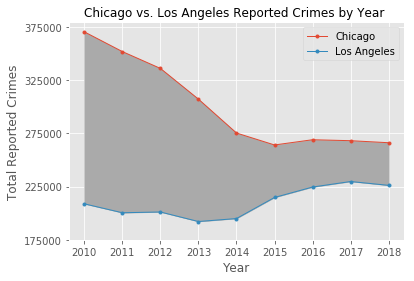

In [19]:
with plt.style.context("ggplot"):
    plt.plot(crimes_2010_2018_df, marker='.', linewidth = 1.0, label="Chicago")
    plt.plot(la_crime_type_size_df, marker='.', linewidth = 1.0, label="Los Angeles")
    
    plt.fill_between(la_crime_type_size_df.index, crimes_2010_2018_df, la_crime_type_size_df, color = "#aaaaaa")

    plt.title("Chicago vs. Los Angeles Reported Crimes by Year ", fontsize=12)
    
    x_index = np.arange(2010, 2019)
    y_index = np.arange(175000, 400000, 50000)
    plt.xticks(x_index)
    plt.yticks(y_index)
    plt.xlabel("Year")
    plt.ylabel("Total Reported Crimes")
    
    plt.legend()


## Summary

All of the four figures in this report utilize edata from Crimes - 2001 to present datset, which contains all recorded and reported crime data in Chicago from 2001 to 2019. This includes location, time, type of incident, description, arrest True/False boolean, and so on. However, my visualizations are only concerned with the year, crime type, and the arrest status of the incident. The first visualization is an interactive dashboard. IF you click on a crime type bar, you should be shown how many incidents of that type have occurred from 2001 to 2019 in Chicago, but on the right hand side the line plot will also update where it will show how many incidents there were for that crime per year. The goal here is show that many of the most common crimes are not in fact violent crimes. For example homocide is the 21th most common crime in Chicago. Additionally, the line plot demonstrates that there is a downward trend for the amount of crime in Chicago for over a decade now. 

While the first visualization intends to demonstrate that ... The second visualization gives a more detailed view 

Lastly, the third visualization compares total crime per year in Chicago to Los Angeles. Los Angeles is chosen because  and you can clearly see that there has been about 100,000 less crimes committed per year in Chicago. The intent is to demonstrate that 

#violent crimes have  significantly lower arrest percentages; describe some crimes; reset cell warning


This dashboard has two plots; These two plots display crime data in Chicago from 2001 to 2019, and it is important to note that all data only represents reported crimes. The first plot shows the twenty most common crimes from 2001 to 2019 in Chicago and how much crime was committed for each crime. It should also be noted that the y-values are on a per thousand basiss to increase readability and clarity. You can click on the bars, which will then give a print out of the crime type and amount of crime committed above the plot. The selected bar will also be highlighted orange to be a visual aid. Additionally, when you click on a bar, the crime of that bar is then plotted in the second plot, which shows how many criminal incididents of that crime occured for each year within the year range. 



## Bibliography

Police. Crimes - 2001 to present. April 17, 2001. Distributed by Chicago Data Portal. https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2. 

LAPD. Crime Data from 2010 to Present. April 10, 2017. Distributed by Los Angeles Open Data. https://data.lacity.org/A-Safe-City/Crime-Data-from-2010-to-Present/y8tr-7khq. 


